<a href="https://colab.research.google.com/github/Vichuva/cse1/blob/main/CUSTOM_IMAGE_CLASSIFICATION_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow opencv-python matplotlib
#tensor flow and tensorflow gpu used for as part of the deep learning pipeline setup by using keras sequential api setup
#openCV used for removing dodgy images
#matplotlib used for visualizing our custom input images

In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [4]:
import tensorflow as tf
import os #used for navigating through files

In [5]:
# Avoiding out of memory errors by limiting gpu consumption
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
import cv2 # for reading files
import imghdr #for checking file extensions

In [8]:
data_dir = 'data' #creating a variable that points to the data folder

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): #accessing data(happy,sad)
    for image in os.listdir(os.path.join(data_dir, image_class)): #accessing happy and sad folders
        image_path = os.path.join(data_dir, image_class, image) #accessing all images in the folders
        try:
            img = cv2.imread(image_path) #checking if the file is readable by opencv
            tip = imghdr.what(image_path) #checking the file extension with the
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) #removing files with extensions that are not specified in the list
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data') # loading data(building pipeline) using keras util where it does the inbuilt preprocessings(labels,color,size..etc)

Found 174 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator() # allows us to access the data pipeline

In [14]:
batch = data_iterator.next() # accessing data pipeline

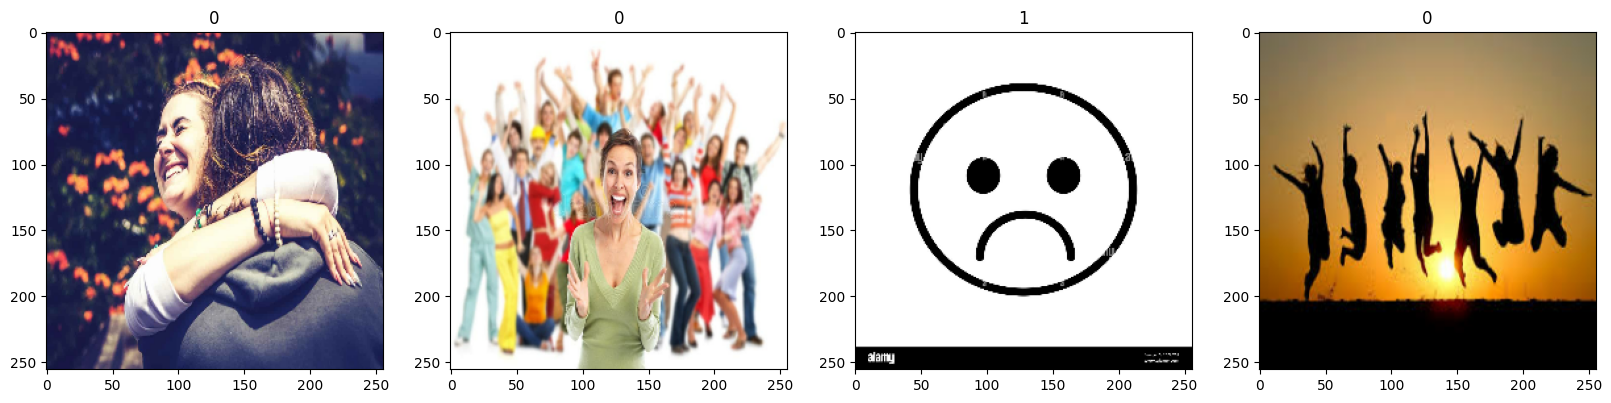

In [15]:
# visualizing the images using matplot library
# HAPPY=0
# SAD=1
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y)) # mapping the data and optimizing RGB
# x=images
# y=label

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.8980392 , 0.9098039 , 0.92941177],
          [0.8980392 , 0.9098039 , 0.92941177],
          [0.9019608 , 0.9137255 , 0.93333334],
          ...,
          [0.7546262 , 0.7820772 , 0.856587  ],
          [0.7647059 , 0.7921569 , 0.8627451 ],
          [0.7647059 , 0.7921569 , 0.8627451 ]],
 
         [[0.8980392 , 0.9098039 , 0.92941177],
          [0.8980392 , 0.9098039 , 0.92941177],
          [0.9019608 , 0.9137255 , 0.93333334],
          ...,
          [0.7595995 , 0.7870505 , 0.8615603 ],
          [0.76231617, 0.79454654, 0.8627451 ],
          [0.76231617, 0.79454654, 0.8627451 ]],
 
         [[0.8980392 , 0.9098039 , 0.92941177],
          [0.8980392 , 0.9098039 , 0.92941177],
          [0.9019608 , 0.9137255 , 0.93333334],
          ...,
          [0.7606618 , 0.78811276, 0.86262256],
          [0.75281864, 0.7841912 , 0.858701  ],
          [0.75281864, 0.7841912 , 0.858701  ]],
 
         ...,
 
         [[0.7116761 , 0.69617367, 0.68447024],
          [0.69161

# 5. Split Data

In [17]:
train_size = int(len(data)*.6)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [18]:
len(data)

6

In [19]:
train_size+val_size+test_size

6

In [20]:
train = data.take(train_size) #'take' function defines how much data we're taking as input
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
len(test)

1

# 6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential #used for 1 input and 1 output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
#conv2D-- convolutional 2D layer
#maxpool--condensing layer
#dense--fully connected layer
#flatten-reduces the images to a dense layer acceptable input
#dropout--regularization

In [24]:
model = Sequential()

In [25]:
#LAYERS
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())#gives the maximum value from the conv2D filte
#16 filters-3x3 pixel size--moving 1 pixel per move--relu activation to ignore negative values and work on postive values--specifying the input size

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())#condenses the output if the above layers into one single channel so that the dense function can act on it.(30*30*16)

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#gives single output(ie, happy or sad)

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
#adam=optimizer
#tracking accuracy

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [30]:
logdir='logs'#creating variable for log directory

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)#logging into logs directory to analyze the model performance

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#model.fit used for training the model
#train is the training data (4 batches)
#epochs specifies the number of cycles of training over the data
#validation data is the validation batch(1)
#callbacks logs the history of training into the logs folder for future analysis of the model
#training data stored in hist variable

Epoch 1/20
4/4 [==============================] - 14s 2s/step - loss: 1.4807 - accuracy: 0.4766 - val_loss: 0.6032 - val_accuracy: 0.6875
Epoch 2/20
4/4 [==============================] - 11s 3s/step - loss: 0.6938 - accuracy: 0.5625 - val_loss: 0.6471 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.6514 - accuracy: 0.5547 - val_loss: 0.6335 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.6072 - accuracy: 0.5938 - val_loss: 0.5703 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 10s 3s/step - loss: 0.5592 - accuracy: 0.7500 - val_loss: 0.4226 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 12s 3s/step - loss: 0.4981 - accuracy: 0.8125 - val_loss: 0.3499 - val_accuracy: 0.9375
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.4061 - accuracy: 0.8594 - val_loss: 0.2928 - val_accuracy: 0.8750
Epoch 8/20
4/4 [=====================

# 8. Plot Performance

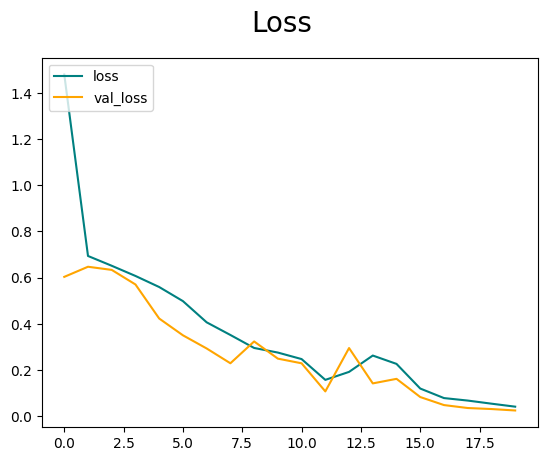

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')#training loss
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')#validation loss
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

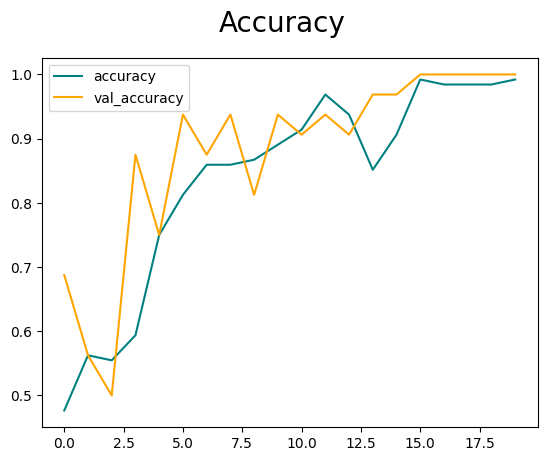

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')#training accuracy
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')#validation accuracy
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy #three key metrics for evaluating the model

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():#looping through each batch in test data
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 289ms/step


In [39]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8333333134651184, Recall:1.0, Accuracy:0.9285714030265808


# 10. Test

In [40]:
import cv2

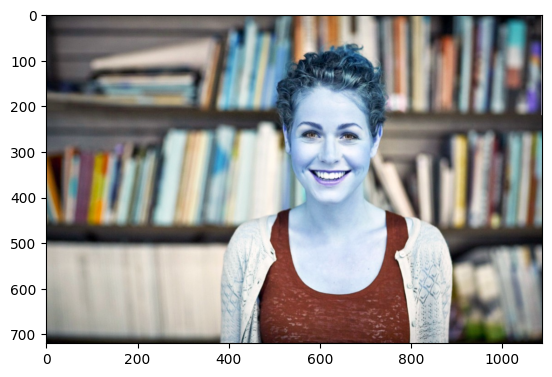

In [63]:
img = cv2.imread('happytest.jpg')
plt.imshow(img)
plt.show()

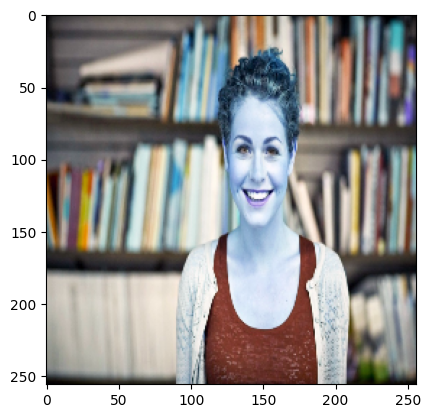

In [64]:
resize = tf.image.resize(img, (256,256))#resizing image into 256x256 pixel
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))
#the model expects us to give the input in batches therefore we push the images into another list

1/1 [==============================] - 0s 31ms/step


In [66]:
yhat

array([[0.00016512]], dtype=float32)

In [67]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [68]:
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('models','imageclassifier.h5'))#saving the new model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
new_model = load_model('models/imageclassifier.h5')#loading new model for prediction

In [75]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))#predicting an image

1/1 [==============================] - 0s 52ms/step


In [76]:
if yhat_new > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
